# 메타데이터와 스펙 작성 - 서비스

- 디플로이먼트와 서비스는 거의 세트
- 서비스의 역할은 파드로 들어오는 요청을 관리하는 것이므로 설정 내용도 통신과 관련된 것

**유형(type) 설정**
- 유형 : 서비스의 종류
- 외부로부터 서비스에 어떤 유형의 IP 주소(또는 DNS)로 접근할지 설정
1. ClusterIP : 클러스터IP를 통해 서비스에 접근하도록 함(외부에서는 접근 불가)
2. NodePort : 워커 노드의 IP를 통해 서비스에 접근하도록 함
3. LoadBalancer : 로드밸런서의 IP를 통해 서비스에 접근하도록 함
4. ExternalName : 파드에서 서비스를 통ㅇ해 외부로 나가기 위한 설정 
- 실무에서는 loadBalancer로 설정하는 경우가 대부분 

In [ ]:
apiVersion: v1
kind: Service
metadata:
  name: apa000ser # 서비스의 이름
spec:
  type: NodePort # 서비스의 유형
  ports: # 포트 설정
  - port: 8099 # 서비스의 포트
    targetPort: 80 # 컨테이너 포트
    protocol: TCP # 통신에 사용되는 프로토콜. 일반적으로 TCP
    nodePort: 30080 # 워커 노드의 포트. 30000과 32767 사이의 값 설정
  selector: # 셀렉터 설정 
    app: apa000kube

# 쿠버네티스 명령어

**kubectl 명령어 형식**
- kubectl 커맨드 옵션
- 수작업으로 명령어 입력할 일 그리 많지 않음 

**디플로이먼트의 매니페스트 파일 읽어 들이기**
- kubectl apply -f C:\Users\사용자명\Documents\kube_folder\apa000dep.yml
- kubectl get pods 
- apply : 리소스의 변경 상태를 반영
- get : 리소스의 상태를 화면에 출력

In [ ]:
apiVersion: apps/v1
kind: Deployment
metadata:
  name: apa000dep
spec:
  selector:
    matchLabels:
      app: apa000kube
  replicas: 3
  template:
    metadata:
      labels:
        app: apa000kube
    spec:
      containers:
      - name: apa000ex91
        image: httpd
        ports:
        - containerPort: 80

## 성공 결과

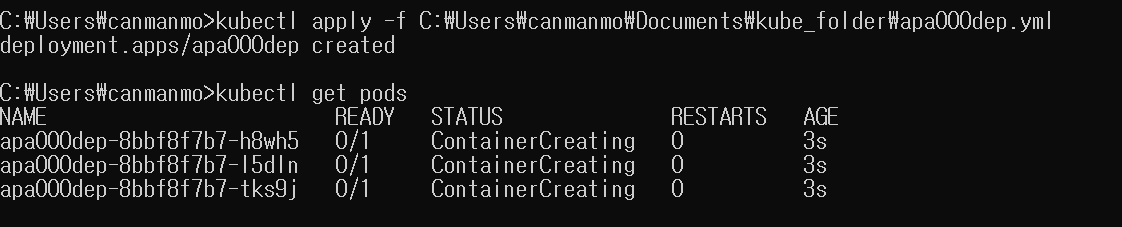

**서비스의 매니페스트 파일 읽어 들이기**
- kubectl apply -f C:\Users\사용자명\Documents\kube_folder\apa000ser.yml
- kubectl get services

In [ ]:
apiVersion: v1
kind: Service
metadata:
  name: apa000ser
spec:
  type: NodePort
  ports:
  - port: 8099
    targetPort: 80
    protocol: TCP
    nodePort: 30080
  selector:
    app: apa000kube

## 성공 결과

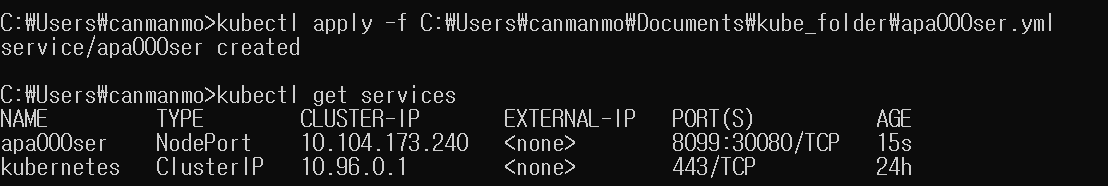

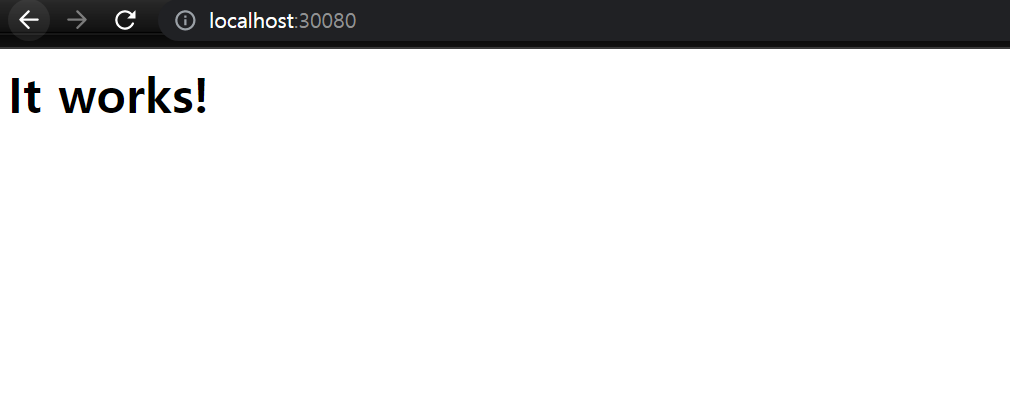

# 쿠버네티스 연습

**매니페스트 파일로 파드의 개수 늘리기**
- 레플리카 수 3에서 5로 수정
- 수정한 매니페스트 파일 쿠버네티스에 읽어 들이기

In [ ]:
apiVersion: apps/v1
kind: Deployment
metadata:
  name: apa000dep
spec:
  selector:
    matchLabels:
      app: apa000kube
  replicas: 5 # 수정 
  template:
    metadata:
      labels:
        app: apa000kube
    spec:
      containers:
      - name: apa000ex91
        image: httpd
        ports:
        - containerPort: 80

- kubectl apply -f C:\Users\사용자명\Documents\kube_folder\apa000dep.yml

## 성공 결과

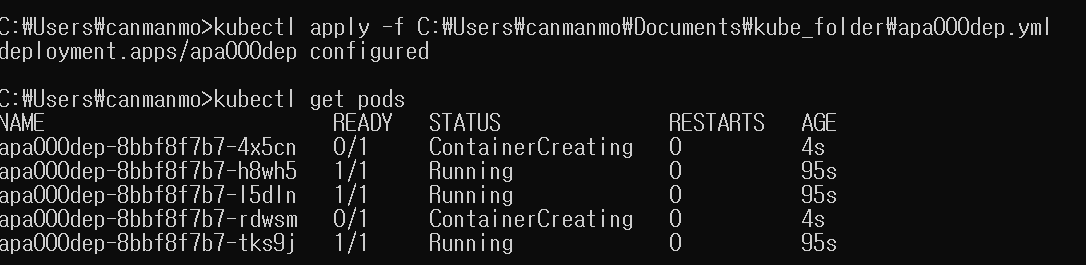

**아파치를 nginx로 바꾸기**
- 컨테이너 종류 변경

In [ ]:
apiVersion: apps/v1
kind: Deployment
metadata:
  name: apa000dep
spec:
  selector:
    matchLabels:
      app: apa000kube
  replicas: 5 
  template:
    metadata:
      labels:
        app: apa000kube
    spec:
      containers:
      - name: apa000ex91
        image: nginx # 수정
        ports:
        - containerPort: 80

## 성공 결과

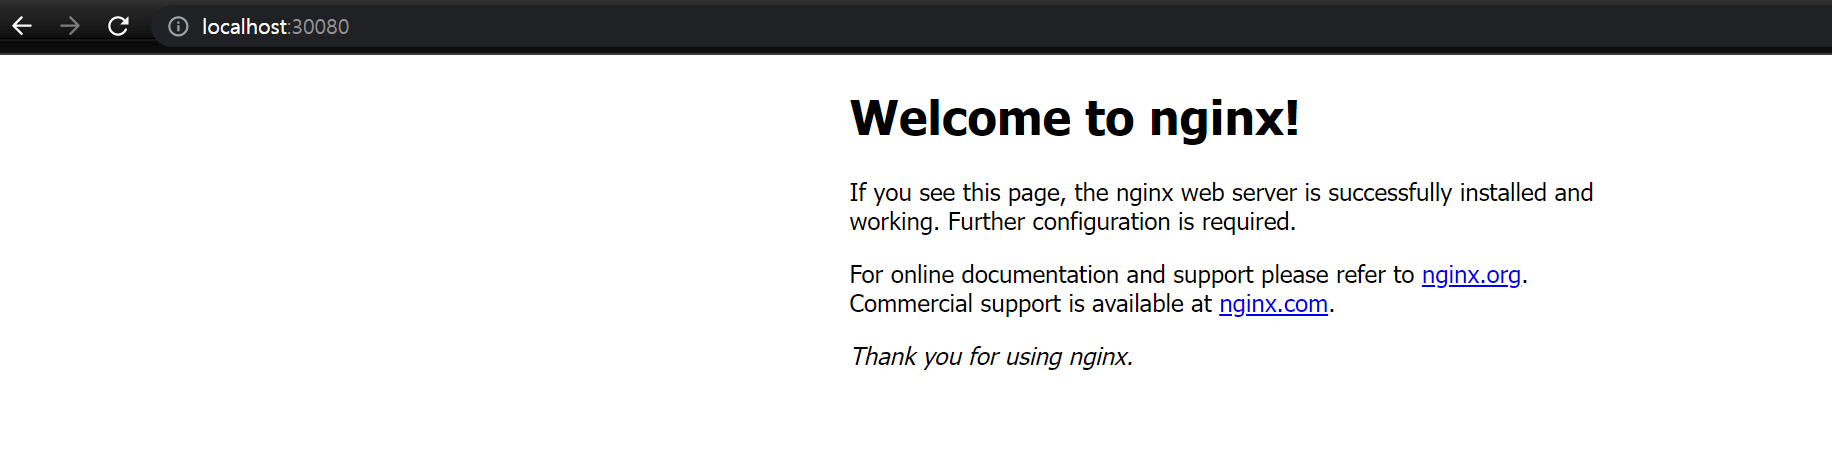

**수동으로 파드 삭제 후 자동복구 확인**
- 바람직한 상태 유지 확인 

In [ ]:
# pods ID 확인
kubectl get pods

# 수동으로 파드 하나 삭제
kebuectl delete pod apa000dep-6c786f8cc9-dv9lw

# 삭제된 파드 보충 확인
kubectl get pods

## 성공 결과

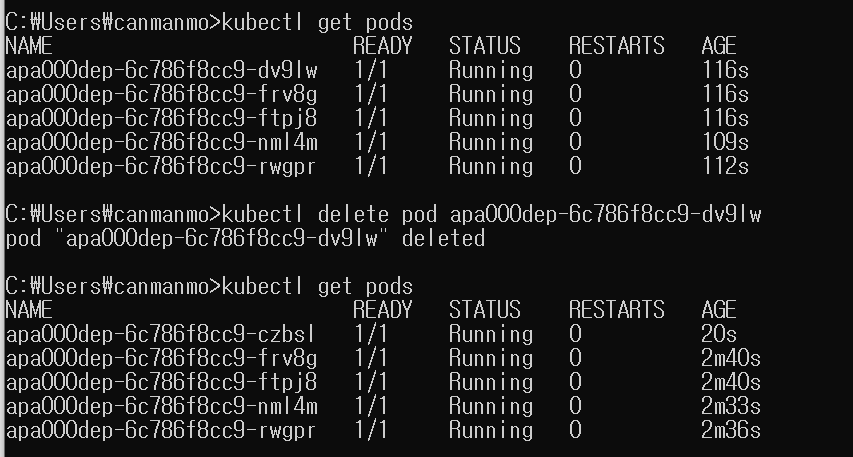

**디플로이먼트, 서비스 삭제**
- delete : 리소스 삭제
- kubectl delete -f C:\Users\사용자명\Documents\kube_folder\apa000dep.yml
- kubectl delete -f C:\Users\사용자명\Documents\kube_folder\apa000ser.yml



## 성공 결과

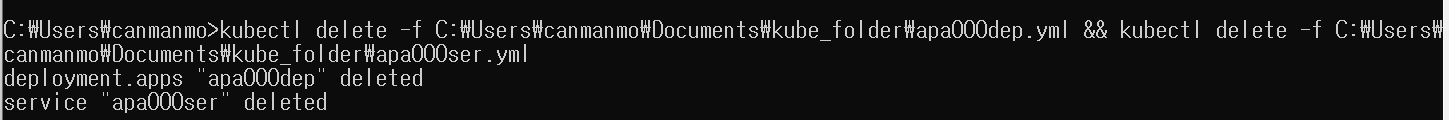